### Facebook Prophet
Facebook developed the Prophet model that is publicly available for everyone. A-Team financial will utilise the prophet model to conduct its stock analysis. FB Prophet is able to capture daily, weekly and yearly seasonality along with holiday effects, by implementing additive regression models. 

The Prophet model fitting procedure is usually very fast (even for thousands of observations) and it does not require any data pre-processing. It deals also with missing data and outliers.

In [1]:
pip install fbprophet

In [2]:
pip install yfinance

In [3]:
import numpy as np
import os
import pandas as pd
import urllib
from datetime import datetime
from pathlib import Path 
import matplotlib.pyplot as plt
from fbprophet import Prophet
import yfinance as yf
import csv

# Facebook Stock Analysis

In [4]:
Facebook = yf.Ticker("FB")

In [5]:
df = yf.download("FB", period="max")
df.head()

[*********************100%***********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2012-05-18,42.049999,45.000000,38.000000,38.230000,38.230000,573576400
2012-05-21,36.529999,36.660000,33.000000,34.029999,34.029999,168192700
2012-05-22,32.610001,33.590000,30.940001,31.000000,31.000000,101786600
2012-05-23,31.370001,32.500000,31.360001,32.000000,32.000000,73600000
2012-05-24,32.950001,33.209999,31.770000,33.029999,33.029999,50237200


In [6]:
df = df.drop(columns='Open')
df.head()

,High,Low,Close,Adj Close,Volume
Date,,,,,
2012-05-18,45.000000,38.000000,38.230000,38.230000,573576400
2012-05-21,36.660000,33.000000,34.029999,34.029999,168192700
2012-05-22,33.590000,30.940001,31.000000,31.000000,101786600
2012-05-23,32.500000,31.360001,32.000000,32.000000,73600000
2012-05-24,33.209999,31.770000,33.029999,33.029999,50237200


In [7]:
df = df.drop(columns='High')
df.head()

,Low,Close,Adj Close,Volume
Date,,,,
2012-05-18,38.000000,38.230000,38.230000,573576400
2012-05-21,33.000000,34.029999,34.029999,168192700
2012-05-22,30.940001,31.000000,31.000000,101786600
2012-05-23,31.360001,32.000000,32.000000,73600000
2012-05-24,31.770000,33.029999,33.029999,50237200


In [8]:
df = df.drop(columns='Low')
df.head()

,Close,Adj Close,Volume
Date,,,
2012-05-18,38.230000,38.230000,573576400
2012-05-21,34.029999,34.029999,168192700
2012-05-22,31.000000,31.000000,101786600
2012-05-23,32.000000,32.000000,73600000
2012-05-24,33.029999,33.029999,50237200


In [9]:
df = df.drop(columns='Adj Close')
df.head()

,Close,Volume
Date,,
2012-05-18,38.230000,573576400
2012-05-21,34.029999,168192700
2012-05-22,31.000000,101786600
2012-05-23,32.000000,73600000
2012-05-24,33.029999,50237200


In [10]:
df = df.drop(columns='Volume')
df.head()

,Close
Date,
2012-05-18,38.230000
2012-05-21,34.029999
2012-05-22,31.000000
2012-05-23,32.000000
2012-05-24,33.029999


In [11]:
df.reset_index(inplace=True)
df.head()

,Date,Close
0,2012-05-18,38.230000
1,2012-05-21,34.029999
2,2012-05-22,31.000000
3,2012-05-23,32.000000
4,2012-05-24,33.029999


In [12]:
df = df[["Date","Close"]] 
df = df.rename(columns = {"Date":"ds","Close":"y"}) # FB profit requires the date and close columns named 'ds' and 'y' resspectively
df.head()

,ds,y
0,2012-05-18,38.230000
1,2012-05-21,34.029999
2,2012-05-22,31.000000
3,2012-05-23,32.000000
4,2012-05-24,33.029999


In [13]:
df.head()

,ds,y
0,2012-05-18,38.230000
1,2012-05-21,34.029999
2,2012-05-22,31.000000
3,2012-05-23,32.000000
4,2012-05-24,33.029999


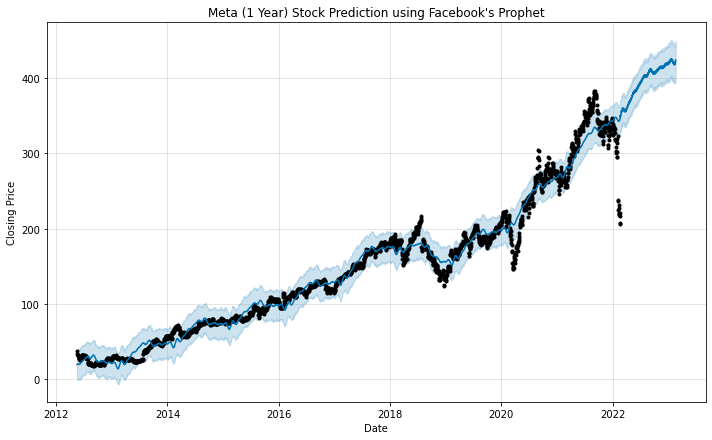

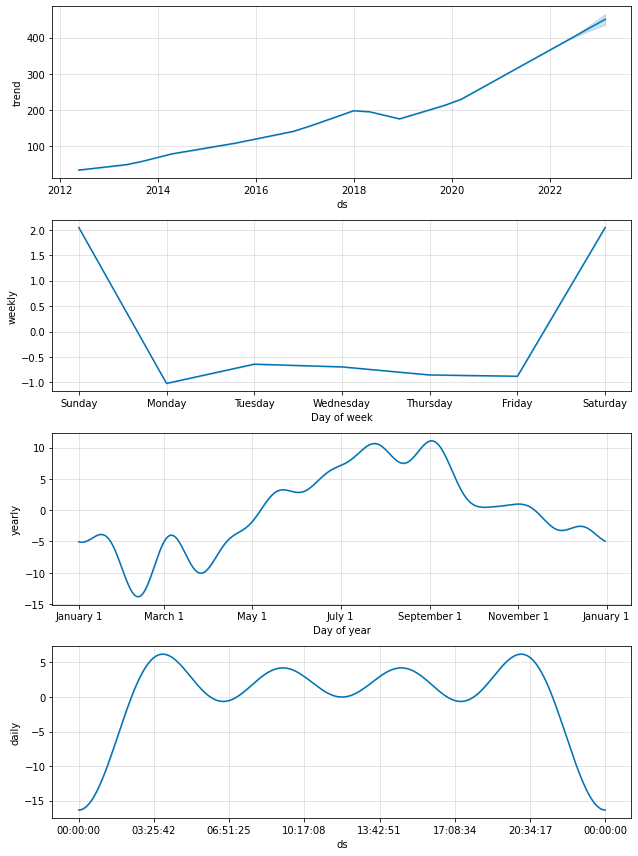

In [14]:
# Fit data using FB 'prophet class model'
m = Prophet(daily_seasonality = True) 
m.fit(df) 

# 1 Year Stock Prediction
future = m.make_future_dataframe(periods=365) 
prediction_01 = m.predict(future)
m.plot(prediction_01)
plt.title("Meta (1 Year) Stock Prediction using Facebook's Prophet")
plt.xlabel("Date")
plt.ylabel("Closing Price")
plt.show()

# Plot components 
m.plot_components(prediction_01)
plt.show()

In [15]:
prediction_01.head()

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,daily,daily_lower,daily_upper,weekly,weekly_lower,weekly_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2012-05-18,34.006950,1.932970,38.732685,34.006950,34.006950,-14.213995,-14.213995,-14.213995,-16.368529,-16.368529,-16.368529,-0.879749,-0.879749,-0.879749,3.034283,3.034283,3.034283,0.0,0.0,0.0,19.792956
1,2012-05-21,34.131619,-0.224144,39.477849,34.131619,34.131619,-14.147917,-14.147917,-14.147917,-16.368529,-16.368529,-16.368529,-1.020511,-1.020511,-1.020511,3.241123,3.241123,3.241123,0.0,0.0,0.0,19.983702
2,2012-05-22,34.173176,1.095154,40.419867,34.173176,34.173176,-13.755465,-13.755465,-13.755465,-16.368529,-16.368529,-16.368529,-0.642192,-0.642192,-0.642192,3.255256,3.255256,3.255256,0.0,0.0,0.0,20.417710
3,2012-05-23,34.214732,1.584752,41.115456,34.214732,34.214732,-13.817315,-13.817315,-13.817315,-16.368529,-16.368529,-16.368529,-0.695526,-0.695526,-0.695526,3.246740,3.246740,3.246740,0.0,0.0,0.0,20.397416
4,2012-05-24,34.256288,0.986493,41.113212,34.256288,34.256288,-14.003408,-14.003408,-14.003408,-16.368529,-16.368529,-16.368529,-0.854154,-0.854154,-0.854154,3.219276,3.219276,3.219276,0.0,0.0,0.0,20.252880


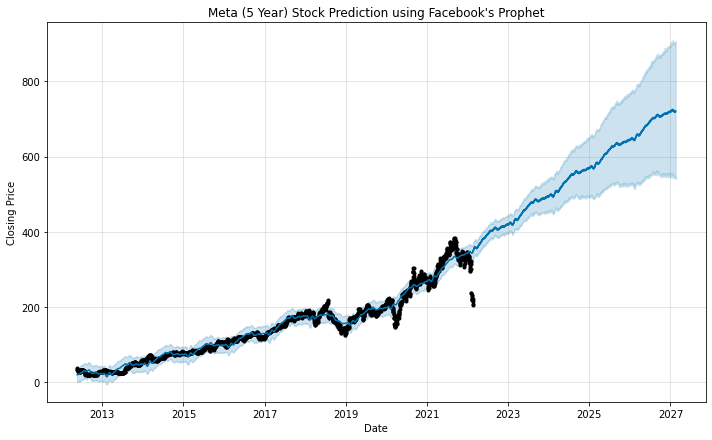

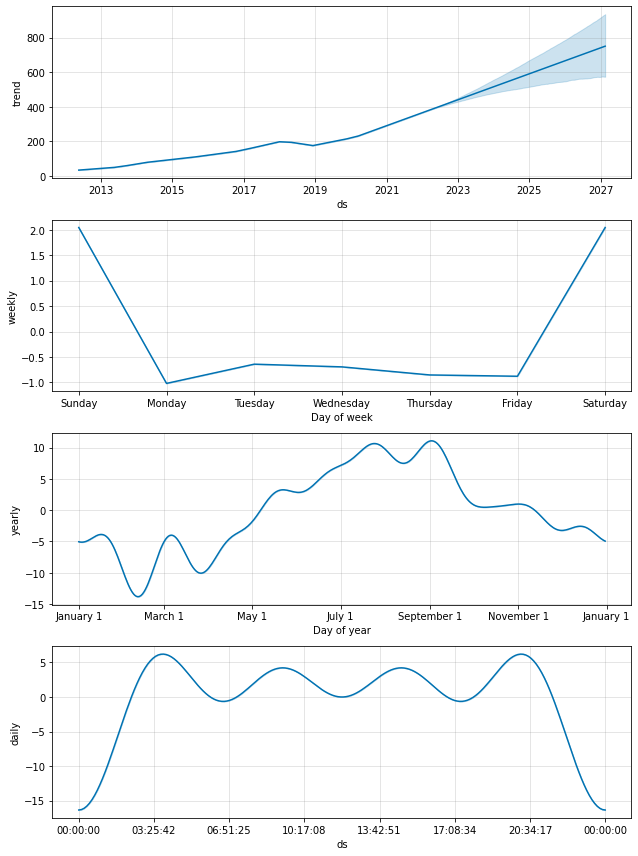

In [16]:
# Fit data using FB 'prophet class model'
m = Prophet(daily_seasonality = True) 
m.fit(df) 

# 5 Year Stock Prediction
future = m.make_future_dataframe(periods=1825) 
prediction_05 = m.predict(future)
m.plot(prediction_05)
plt.title("Meta (5 Year) Stock Prediction using Facebook's Prophet")
plt.xlabel("Date")
plt.ylabel("Closing Price")
plt.show()

# Plot components 
m.plot_components(prediction_05)
plt.show()

In [17]:
prediction_05.head()

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,daily,daily_lower,daily_upper,weekly,weekly_lower,weekly_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2012-05-18,34.006950,-0.319909,40.819173,34.006950,34.006950,-14.213995,-14.213995,-14.213995,-16.368529,-16.368529,-16.368529,-0.879749,-0.879749,-0.879749,3.034283,3.034283,3.034283,0.0,0.0,0.0,19.792956
1,2012-05-21,34.131619,-0.979541,39.363676,34.131619,34.131619,-14.147917,-14.147917,-14.147917,-16.368529,-16.368529,-16.368529,-1.020511,-1.020511,-1.020511,3.241123,3.241123,3.241123,0.0,0.0,0.0,19.983702
2,2012-05-22,34.173176,1.358589,39.084541,34.173176,34.173176,-13.755465,-13.755465,-13.755465,-16.368529,-16.368529,-16.368529,-0.642192,-0.642192,-0.642192,3.255256,3.255256,3.255256,0.0,0.0,0.0,20.417710
3,2012-05-23,34.214732,1.100746,40.792832,34.214732,34.214732,-13.817315,-13.817315,-13.817315,-16.368529,-16.368529,-16.368529,-0.695526,-0.695526,-0.695526,3.246740,3.246740,3.246740,0.0,0.0,0.0,20.397416
4,2012-05-24,34.256288,1.538571,39.736244,34.256288,34.256288,-14.003408,-14.003408,-14.003408,-16.368529,-16.368529,-16.368529,-0.854154,-0.854154,-0.854154,3.219276,3.219276,3.219276,0.0,0.0,0.0,20.252880


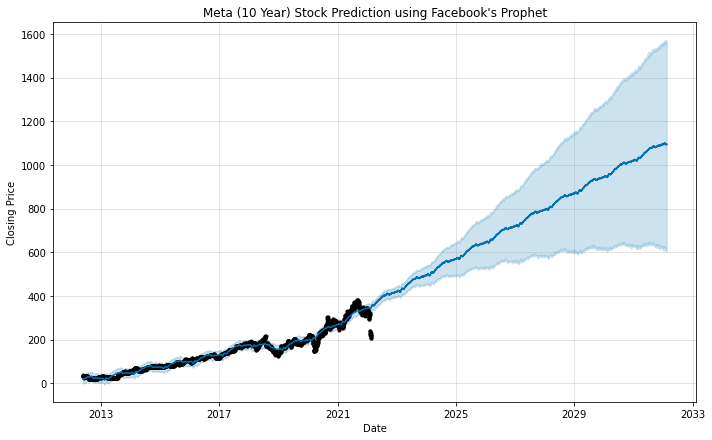

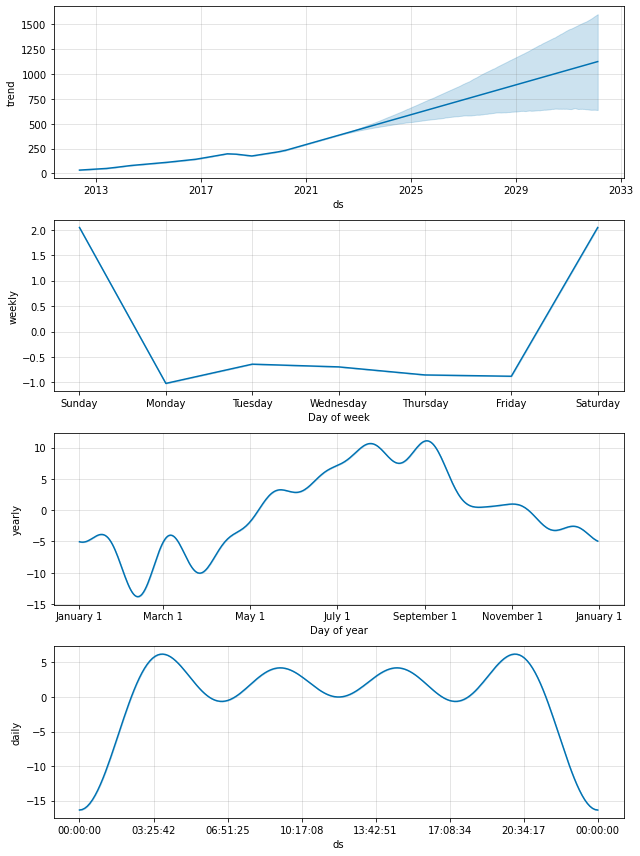

In [18]:
# Fit data using FB 'prophet class model'
m = Prophet(daily_seasonality = True) 
m.fit(df) 

# 10 Year Stock Prediction
future = m.make_future_dataframe(periods=3650) 
prediction_10 = m.predict(future)
m.plot(prediction_10)
plt.title("Meta (10 Year) Stock Prediction using Facebook's Prophet")
plt.xlabel("Date")
plt.ylabel("Closing Price")
plt.show()

# Plot components 
m.plot_components(prediction_10)
plt.show()

In [19]:
prediction_10.head()

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,daily,daily_lower,daily_upper,weekly,weekly_lower,weekly_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2012-05-18,34.006950,0.110160,40.483732,34.006950,34.006950,-14.213995,-14.213995,-14.213995,-16.368529,-16.368529,-16.368529,-0.879749,-0.879749,-0.879749,3.034283,3.034283,3.034283,0.0,0.0,0.0,19.792956
1,2012-05-21,34.131619,-0.610897,40.295773,34.131619,34.131619,-14.147917,-14.147917,-14.147917,-16.368529,-16.368529,-16.368529,-1.020511,-1.020511,-1.020511,3.241123,3.241123,3.241123,0.0,0.0,0.0,19.983702
2,2012-05-22,34.173176,0.226095,40.126652,34.173176,34.173176,-13.755465,-13.755465,-13.755465,-16.368529,-16.368529,-16.368529,-0.642192,-0.642192,-0.642192,3.255256,3.255256,3.255256,0.0,0.0,0.0,20.417710
3,2012-05-23,34.214732,-0.594127,38.827616,34.214732,34.214732,-13.817315,-13.817315,-13.817315,-16.368529,-16.368529,-16.368529,-0.695526,-0.695526,-0.695526,3.246740,3.246740,3.246740,0.0,0.0,0.0,20.397416
4,2012-05-24,34.256288,0.474621,38.850758,34.256288,34.256288,-14.003408,-14.003408,-14.003408,-16.368529,-16.368529,-16.368529,-0.854154,-0.854154,-0.854154,3.219276,3.219276,3.219276,0.0,0.0,0.0,20.252880


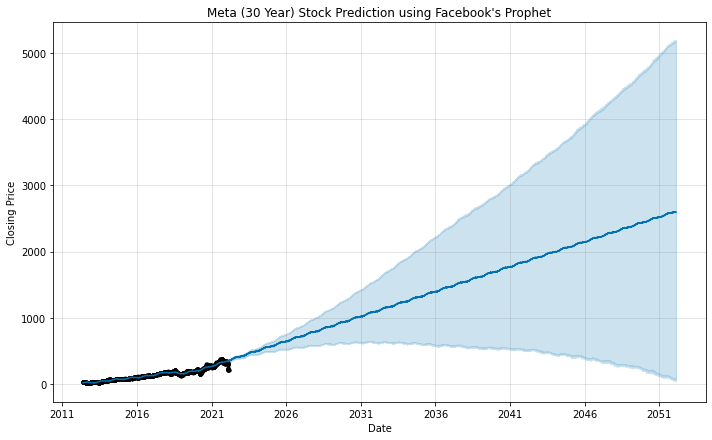

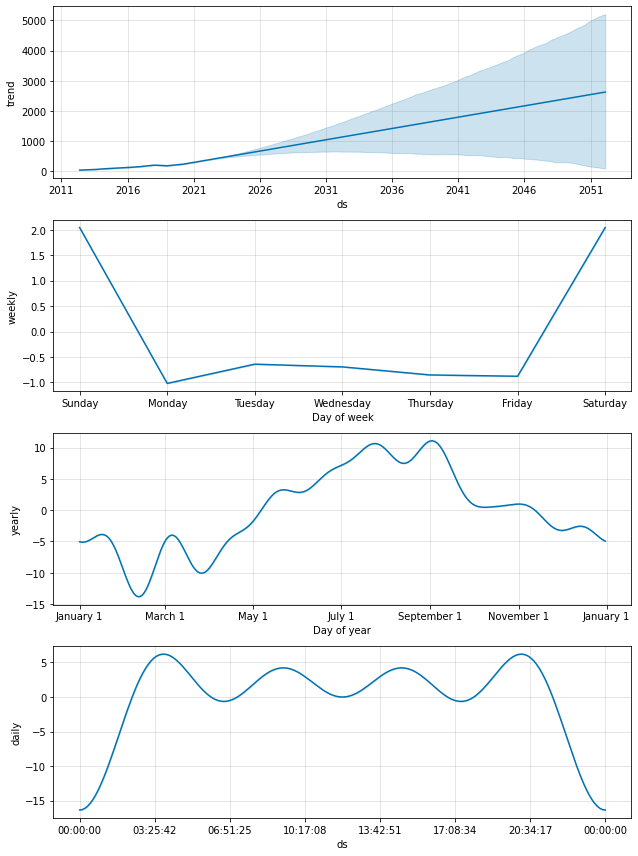

In [20]:
# Fit data using FB 'prophet class model'
m = Prophet(daily_seasonality = True) 
m.fit(df) 

# 30 Year Stock Prediction
future = m.make_future_dataframe(periods=10950) 
prediction_30 = m.predict(future)
m.plot(prediction_30)
plt.title("Meta (30 Year) Stock Prediction using Facebook's Prophet")
plt.xlabel("Date")
plt.ylabel("Closing Price")
plt.show()

# Plot components 
m.plot_components(prediction_30)
plt.show()

In [21]:
prediction_30.head()

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,daily,daily_lower,daily_upper,weekly,weekly_lower,weekly_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2012-05-18,34.006950,-0.331967,39.901938,34.006950,34.006950,-14.213995,-14.213995,-14.213995,-16.368529,-16.368529,-16.368529,-0.879749,-0.879749,-0.879749,3.034283,3.034283,3.034283,0.0,0.0,0.0,19.792956
1,2012-05-21,34.131619,0.488170,38.432968,34.131619,34.131619,-14.147917,-14.147917,-14.147917,-16.368529,-16.368529,-16.368529,-1.020511,-1.020511,-1.020511,3.241123,3.241123,3.241123,0.0,0.0,0.0,19.983702
2,2012-05-22,34.173176,1.049173,41.605793,34.173176,34.173176,-13.755465,-13.755465,-13.755465,-16.368529,-16.368529,-16.368529,-0.642192,-0.642192,-0.642192,3.255256,3.255256,3.255256,0.0,0.0,0.0,20.417710
3,2012-05-23,34.214732,0.781875,40.513775,34.214732,34.214732,-13.817315,-13.817315,-13.817315,-16.368529,-16.368529,-16.368529,-0.695526,-0.695526,-0.695526,3.246740,3.246740,3.246740,0.0,0.0,0.0,20.397416
4,2012-05-24,34.256288,1.877223,39.708478,34.256288,34.256288,-14.003408,-14.003408,-14.003408,-16.368529,-16.368529,-16.368529,-0.854154,-0.854154,-0.854154,3.219276,3.219276,3.219276,0.0,0.0,0.0,20.252880


In [22]:
# Expert Broker Recommendation(s)

In [23]:
Facebook.recommendations

,Firm,To Grade,From Grade,Action
Date,,,,
2012-06-22 07:56:00,Nomura,Buy,,init
2012-06-27 05:39:00,JP Morgan,Overweight,,init
2012-06-27 05:41:00,Bank of America,Neutral,,init
2012-06-27 05:44:00,Citigroup,Neutral,,init
2012-06-27 05:58:00,Credit Suisse,Neutral,,init
...,...,...,...,...
2022-02-04 10:47:04,DZ Bank,Sell,Hold,down
2022-02-04 11:41:16,China Renaissance,Hold,Buy,down
2022-02-04 12:34:01,Rosenblatt,Buy,,main
